<a href="https://colab.research.google.com/github/woodi97/MachineLearningProject/blob/main/assignment/03/assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for binary classification

## import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [ ]:
directory_data  = './data/'
filename_data   = 'assignment_03_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


```console

$ git commit -m "Successfully Import Assignment_03 training data" assignment_03.ipynb

```

## vectorize image data

In [ ]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(vector_x_train.shape)
print(vector_x_test.shape)

(10000, 784)
(1800, 784)


```console

$ git commit -m "Complete Vectorize Image Data" assignment_03.ipynb

```

## index for each class

In [ ]:
index_train_0 = [i for i, v in enumerate(y_train) if v==0]
index_train_1 = [i for i, v in enumerate(y_train) if v==1]

index_test_0 = [i for i, v in enumerate(y_test) if v==0]
index_test_1 = [i for i, v in enumerate(y_test) if v==1]

```console

$ git commit -m "Complete Get Index of y_train & y_test" assignment_03.ipynb

```

## plot data

In [ ]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [ ]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

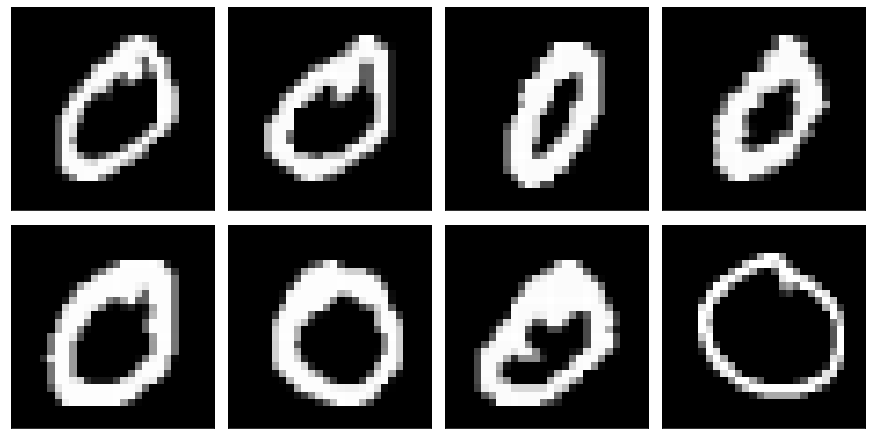

In [ ]:

index_data_0 = np.array(range(nPlot))
plot_data_grid(x_train, index_data_0, nRow, nCol)

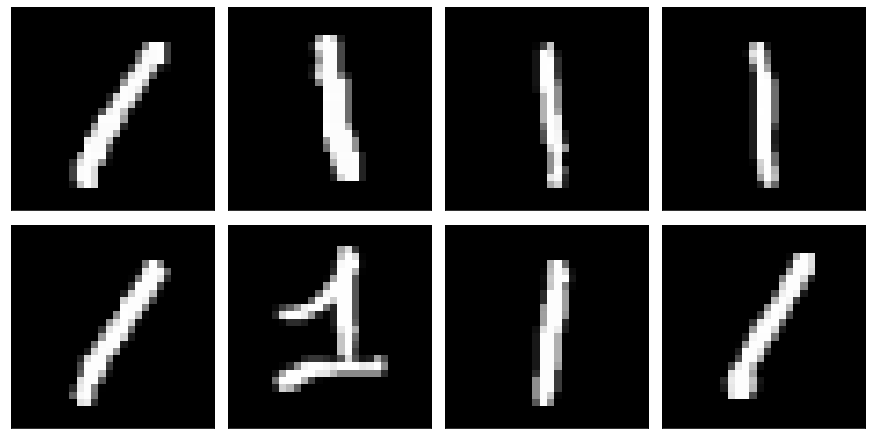

In [ ]:
index_data_1 = index_data_0 + 5000
plot_data_grid(x_train, index_data_1, nRow, nCol)

```console

$ git commit -m "Complete Plotting Data" assignment_03.ipynb

```

## linear layer

In [ ]:
def layer_linear(input, weight):
    output = np.empty((input.shape[0]))
    transposedWeight = np.transpose(weight)
    for i in range(input.shape[0]):
        output[i] = np.inner(transposedWeight, input[i])

    return output

```console

$ git commit -m "Complete the function for linear layer" assignment_03.ipynb

```

## activation function : Sigmoid

In [ ]:
def activation_sigmoid(input):
    output = np.empty((input.shape[0]))
    for i in range(input.shape[0]):
        z = np.exp(-input[i])
        output[i] = 1/(1+z)

    return output

```console

$ git commit -m "Complete the function for the sigmoid activation" assignment_03.ipynb

```

## compute prediction by the forward propagation of the neural network

In [ ]:
def compute_prediction(input, weight):

    output      = layer_linear(input, weight)
    prediction  = activation_sigmoid(output)

    return prediction

```console

$ git commit -m "Complete the function for the compute prediction" assignment_03.ipynb

```

## compute loss function

In [ ]:
def compute_loss(prediction, label):
    sum = 0.0
    for i in range(prediction.shape[0]):
      loss            = -(label[i]*np.log(prediction[i])+(1-label[i])*np.log(1-prediction[i]))
      sum             += loss
    loss_average    =  sum/prediction.shape[0]

    return loss_average

```console

$ git commit -m "Complete the function for the loss" assignment_03.ipynb

```

## compute gradient

In [ ]:
def compute_gradient(input, prediction, label):
    sum = 0.0
    for i in range(input.shape[0]):
      residual    = (prediction[i]-label[i]) * input[i]
      sum         += residual
    gradient    = sum/input.shape[0]

    return gradient

```console

$ git commit -m "Complete the function for the computation of gradient" assignment_03.ipynb

```

## compute accuracy

In [ ]:
def compute_accuracy(prediction, label):
    threshold   = 0.5
    bCorrect = np.empty((prediction.shape[0]))
    for i in range(prediction.shape[0]):
      if prediction[i] >= threshold:
        bCorrect[i]    =  1
      else:
        bCorrect[i]    =  0
    accuracy    = np.sum(bCorrect) / len(label)

    return accuracy

```console

$ git commit -m "Complete the function for the computation of accuracy" assignment_03.ipynb

```

## initialize weight

In [ ]:
length_weight   = vector_x_train.shape[1]
weight          = np.ones(length_weight)
weight          = weight * 0.001

print('number of weights: ', length_weight)

number of weights:  784


```console

$ git commit -m "Complete Initialize weight" assignment_03.ipynb

```

## hyper-parameters

In [ ]:
number_iteration    = 1000
learning_rate       = 0.1

## variables for optimization information

In [ ]:
loss_train_iteration        = np.zeros(number_iteration)
loss_test_iteration         = np.zeros(number_iteration)

accuracy_train_iteration    = np.zeros(number_iteration)
accuracy_test_iteration     = np.zeros(number_iteration)

pred_0_train_mean_iteration = np.zeros(number_iteration) 
pred_0_train_std_iteration  = np.zeros(number_iteration) 
pred_1_train_mean_iteration = np.zeros(number_iteration) 
pred_1_train_std_iteration  = np.zeros(number_iteration) 

pred_0_test_mean_iteration = np.zeros(number_iteration) 
pred_0_test_std_iteration  = np.zeros(number_iteration) 
pred_1_test_mean_iteration = np.zeros(number_iteration) 
pred_1_test_std_iteration  = np.zeros(number_iteration) 

## gradient descent iterations

In [ ]:
for i in tqdm(range(number_iteration)):

    prediction_train    = compute_prediction(vector_x_train, weight)
    prediction_test     = compute_prediction(vector_x_test, weight)

    gradient_train      = compute_gradient(vector_x_train, prediction_train, y_train)
    weight              = weight - learning_rate * gradient_train

    prediction_train    = compute_prediction(vector_x_train, weight)
    prediction_test     = compute_prediction(vector_x_test, weight)

    loss_train          = compute_loss(prediction_train, y_train)
    loss_test           = compute_loss(prediction_test, y_test)

    accuracy_train      = compute_accuracy(prediction_train, y_train)
    accuracy_test       = compute_accuracy(prediction_test, y_test)

    pred_train_0    = prediction_train[index_train_0]
    pred_train_1    = prediction_train[index_train_1]

    pred_test_0     = prediction_test[index_test_0]
    pred_test_1     = prediction_test[index_test_1]

    pred_0_train_mean_iteration[i]  = np.mean(pred_train_0)
    pred_0_train_std_iteration[i]   = np.std(pred_train_0)
    pred_1_train_mean_iteration[i]  = np.mean(pred_train_1)
    pred_1_train_std_iteration[i]   = np.std(pred_train_1)

    pred_0_test_mean_iteration[i]   = np.mean(pred_train_0)
    pred_0_test_std_iteration[i]    = np.std(pred_train_0)
    pred_1_test_mean_iteration[i]   = np.mean(pred_train_1)
    pred_1_test_std_iteration[i]    = np.std(pred_train_1)

    loss_train_iteration[i]         = loss_train
    loss_test_iteration[i]          = loss_test

    accuracy_train_iteration[i]     = accuracy_train 
    accuracy_test_iteration[i]      = accuracy_test

100%|██████████| 1000/1000 [03:59<00:00,  4.18it/s]


```console

$ git commit -m "Complete gradient descent iteration" assignment_03.ipynb

```

## plot curve

In [ ]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve

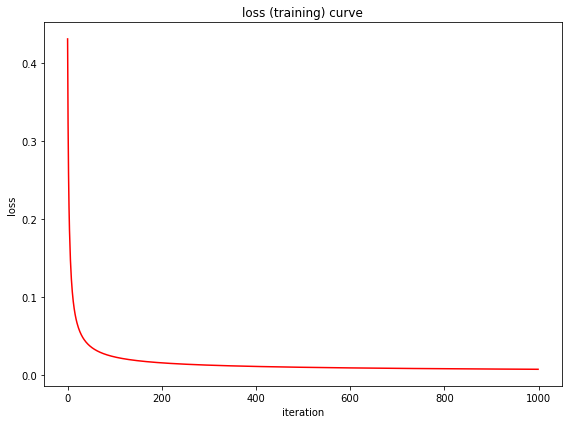

In [ ]:
plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

```console

$ git commit -m "Complete drawing loss(training) curve" assignment_03.ipynb

```

## loss (testing) curve

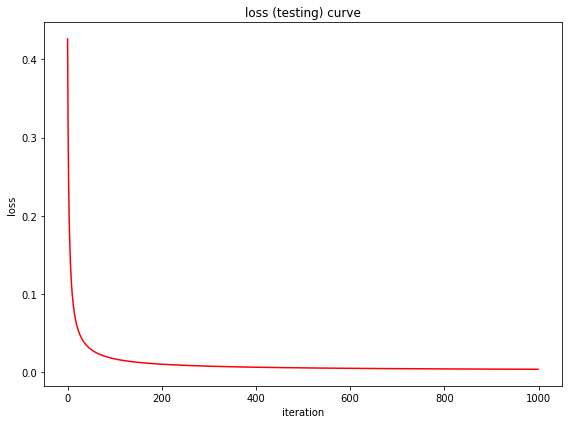

In [ ]:
plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

```console

$ git commit -m "Complete drawing loss(testing) curve" assignment_03.ipynb

```

## accuracy (training) curve

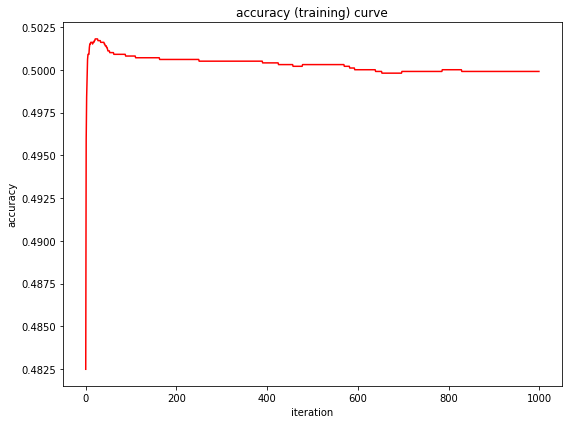

In [ ]:
plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

```console

$ git commit -m "Complete drawing accuracy(training) curve" assignment_03.ipynb

```

## accuracy (testing) curve

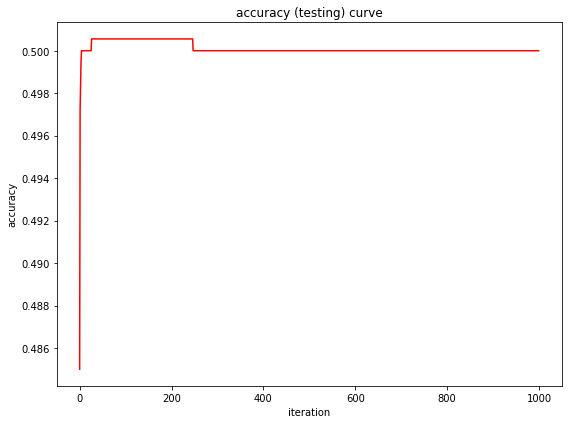

In [ ]:
plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

```console

$ git commit -m "Complete drawing accuracy(testing) curve" assignment_03.ipynb

```

## plot prediction values

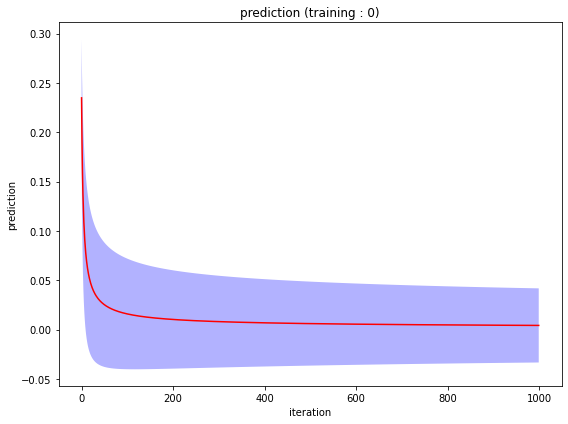

In [ ]:
plot_curve_error(pred_0_train_mean_iteration, pred_0_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 0)')

```console

$ git commit -m "Complete drawing pred_0_train curve" assignment_03.ipynb

```

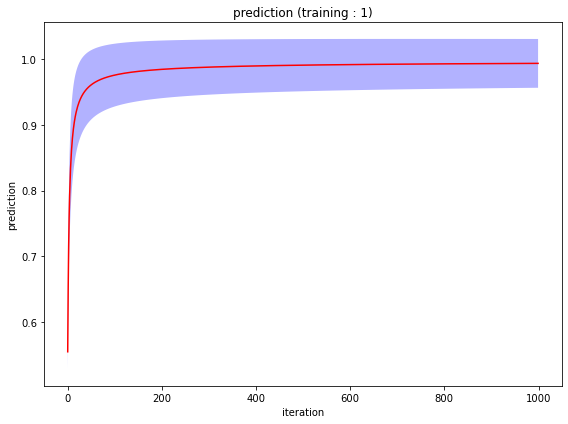

In [ ]:
plot_curve_error(pred_1_train_mean_iteration, pred_1_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 1)')

```console

$ git commit -m "Complete drawing pred_1_train curve" assignment_03.ipynb

```

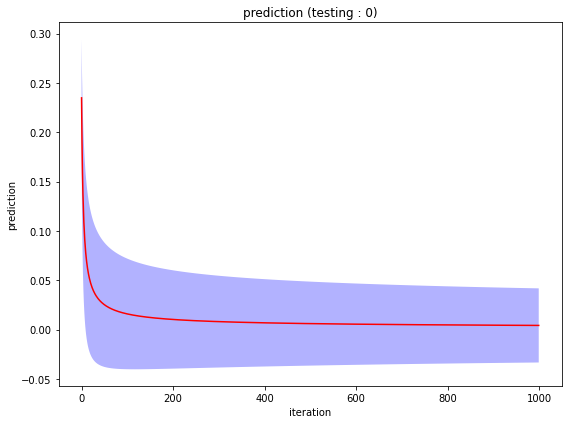

In [ ]:
plot_curve_error(pred_0_test_mean_iteration, pred_0_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 0)')

```console

$ git commit -m "Complete drawing pred_0_text curve" assignment_03.ipynb

```

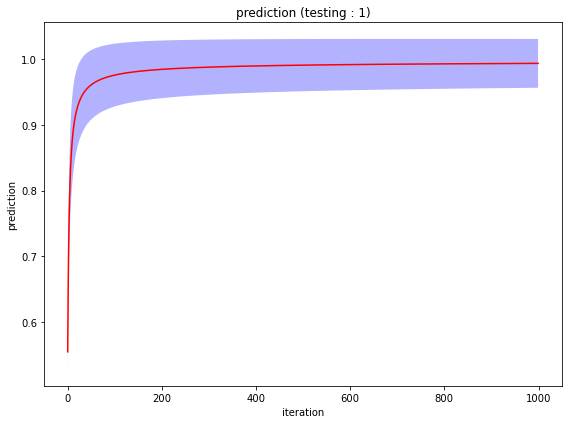

In [ ]:
plot_curve_error(pred_1_test_mean_iteration, pred_1_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 1)')

```console

$ git commit -m "Complete drawing pred_1_test curve" assignment_03.ipynb

```

## print values

In [ ]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [ ]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss

In [ ]:
print_curve(loss_train_iteration, index)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## testing loss

In [ ]:
print_curve(loss_test_iteration, index)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## training accuracy

In [ ]:
print_curve(accuracy_train_iteration, index)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## testing accuracy

In [ ]:
print_curve(accuracy_test_iteration, index)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## functions for presenting the results

In [ ]:
def function_results_01(*args):

    pass

In [ ]:
def function_results_02(*args):
    
    pass

In [ ]:
def function_results_03(*args):
    
    pass

In [ ]:
def function_results_04(*args):
    
    pass

In [ ]:
def function_results_05(*args):
    
    pass

In [ ]:
def function_results_06(*args):
    
    pass

In [ ]:
def function_results_07(*args):
    
    pass

In [ ]:
def function_results_08(*args):
    
    pass

In [ ]:
def function_results_09(*args):
    
    pass

In [ ]:
def function_results_10(*args):
    
    pass

In [ ]:
def function_results_11(*args):
    
    pass

In [ ]:
def function_results_12(*args):
    
    pass

In [ ]:
def function_results_13(*args):
    
    pass

In [ ]:
def function_results_14(*args):
    
    pass

---

# RESULTS

---

## # 01. plot examples of the input training images for '0'

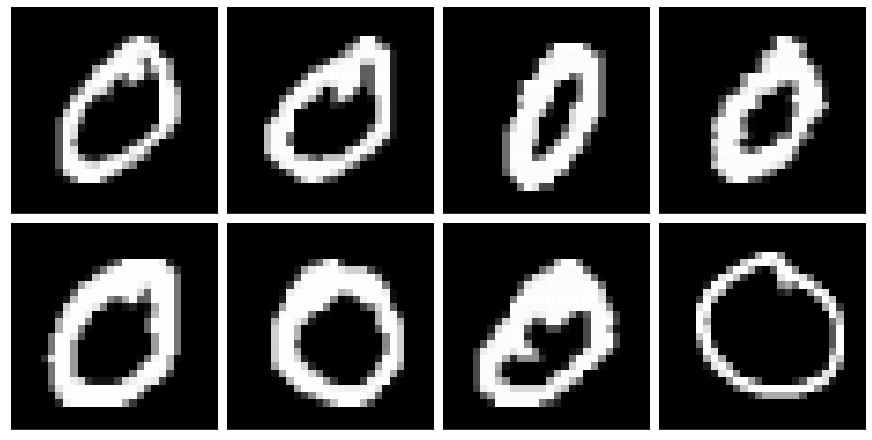

In [ ]:
function_results_01(...)

## # 02. plot examples of the input training images for '1'

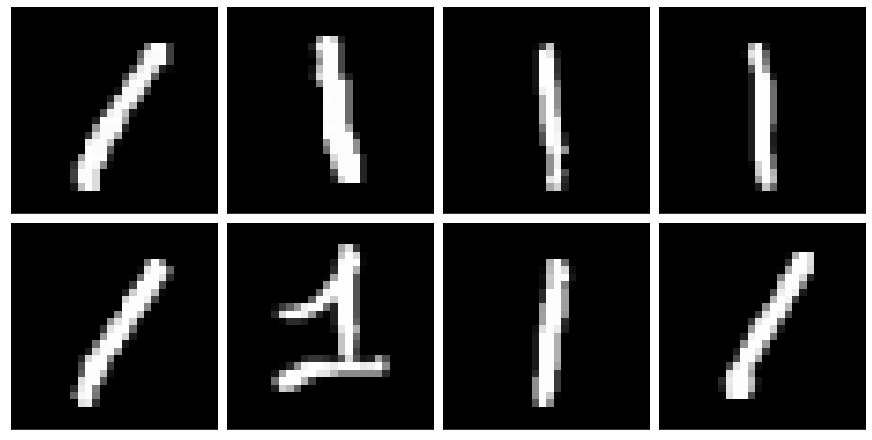

In [ ]:
function_results_02(...)

## # 03. plot the training loss curve (x-axis: iteration, y-axis: loss)

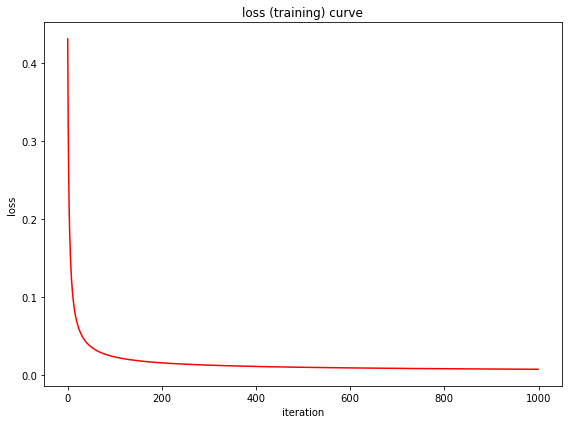

In [ ]:
function_results_03(...)

## # 04. plot the testing loss curve (x-axis: iteration, y-axis: loss)

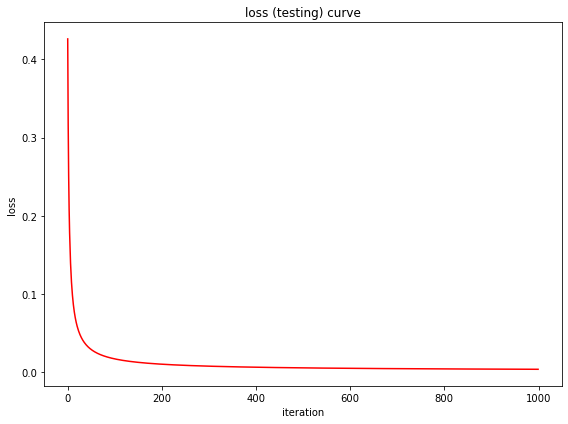

In [ ]:
function_results_04(...)

## # 05. plot the training accuracy curve (x-axis: iteration, y-axis: accuracy)

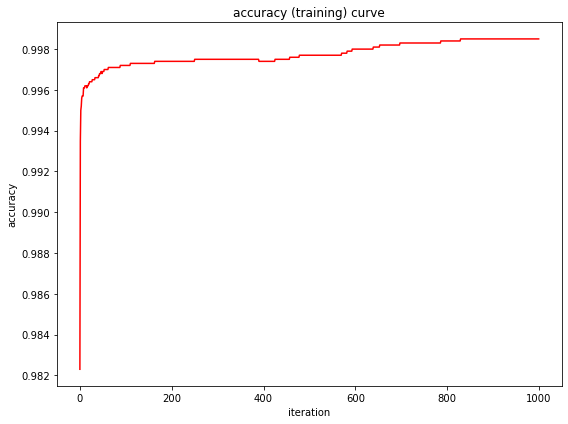

In [ ]:
function_results_05(...)

## # 06. plot the testing accuracy curve (x-axis: iteration, y-axis: accuracy)

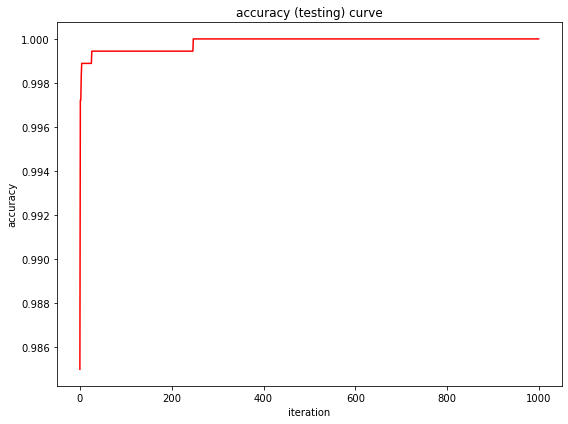

In [ ]:
function_results_06(...)

## # 07. plot the training prediction curve (mean and std) for image 0 (x-axis: iteration, y-axis: prediction)

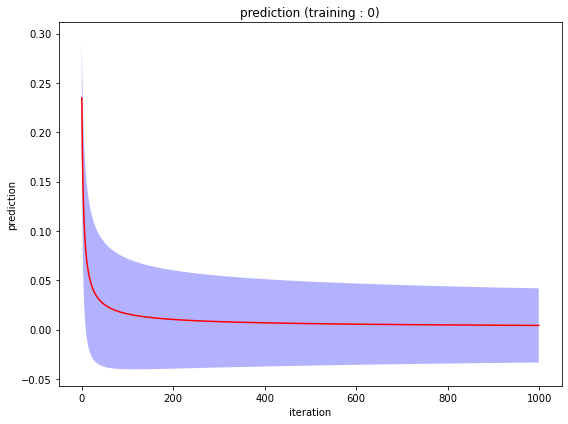

In [ ]:
function_results_07(...)

## # 08. plot the training prediction curve (mean and std) for image 1 (x-axis: iteration, y-axis: prediction)

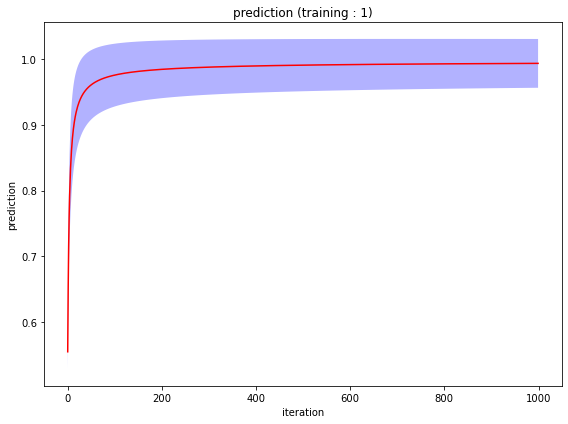

In [ ]:
function_results_08(...)

## # 09. plot the testing prediction curve (mean and std) for image 0 (x-axis: iteration, y-axis: prediction)

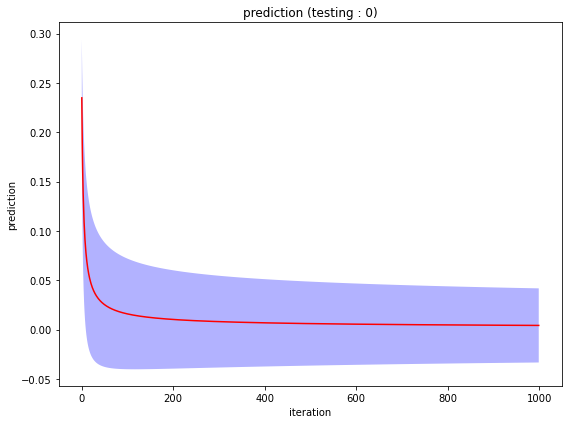

In [ ]:
function_results_09(...)

## # 10. plot the testing prediction curve (mean and std) for image 1 (x-axis: iteration, y-axis: prediction)

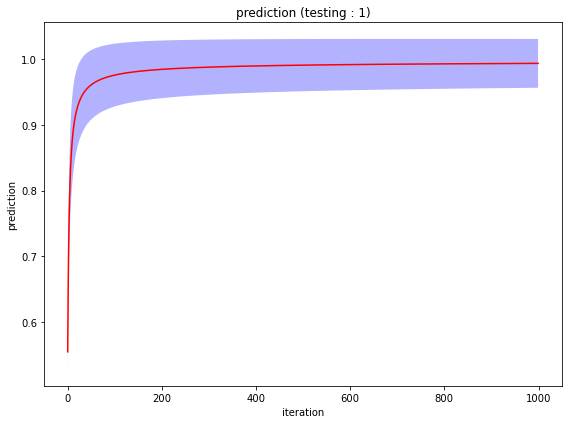

In [ ]:
function_results_10(...)

## # 11. print the training loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_results_11(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 12. print the testing loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_results_12(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 13. print the training accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_results_13(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000


## # 14. print the testing accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [ ]:
function_results_14(...)

index =    0, value = 0.0000000000
index =  100, value = 0.0000000000
index =  200, value = 0.0000000000
index =  300, value = 0.0000000000
index =  400, value = 0.0000000000
index =  500, value = 0.0000000000
index =  600, value = 0.0000000000
index =  700, value = 0.0000000000
index =  800, value = 0.0000000000
index =  900, value = 0.0000000000
